In [1]:
# Run this cell to set up packages for lecture.
from lec04_imports import *

# Lecture 4 – Data Visualization 📈, Density, and Density Histograms
## DSC 10, Summer 2025

### Agenda
 
- Adjusting columns.
- Why visualize?
- Terminology.
- Scatter plots.
- Line plots.
- Bar charts.
- Density
- Introduction to density histograms

### Aside: Keyboard shortcuts

There are several keyboard shortcuts built into Jupyter Notebooks designed to help you save time. To see them, either click the keyboard button in the toolbar above or hit the H key on your keyboard (as long as you're not actively editing a cell).

Particularly useful shortcuts:

| Action | Keyboard shortcut |
| --- | --- |
| Run cell + jump to next cell | SHIFT + ENTER |
| Save the notebook | CTRL/CMD + S |
| Create new cell above/below | A/B |
| Delete cell | DD |

## Adjusting columns

### `.count()` 

As before, we'll work with the `states` DataFrame. Notice the column names don't make sense after grouping with the `.count()` aggregation method.

In [2]:
states = bpd.read_csv('data/states.csv')
states = states.assign(Density=states.get('Population') / states.get('Land Area'))
states = states.set_index('State')
states

,Region,Capital City,Population,Land Area,Party,Density
State,,,,,,
Alabama,South,Montgomery,5024279,50645,Republican,99.21
Alaska,West,Juneau,733391,570641,Republican,1.29
Arizona,West,Phoenix,7151502,113594,Republican,62.96
...,...,...,...,...,...,...
West Virginia,South,Charleston,1793716,24038,Republican,74.62
Wisconsin,Midwest,Madison,5893718,54158,Republican,108.82
Wyoming,West,Cheyenne,576851,97093,Republican,5.94


In [3]:
states.groupby('Region').count()

,Capital City,Population,Land Area,Party,Density
Region,,,,,
Midwest,12,12,12,12,12
Northeast,9,9,9,9,9
South,16,16,16,16,16
West,13,13,13,13,13


### Adjusting columns with `.assign`, `.drop`, and `.get`

1. To rename a column, use `.assign` to create a new column containing the same values as an existing column. 
    - New columns are added on the right.

2. Then use `.drop(columns=list_of_column_labels)` to drop any columns you no longer need. 
    - Alternatively, use `.get(list_of_column_labels)` to keep only certain columns. The columns will appear in the order you specify, so this is also useful for reordering columns!

## Two ways to `.get`

1. Getting a single column name gives a Series.
2. Getting a `list` of column names gives a DataFrame. (Even if the list has just one element!)

In [4]:
states.get('Capital City')

State
Alabama          Montgomery
Alaska               Juneau
Arizona             Phoenix
                    ...    
West Virginia    Charleston
Wisconsin           Madison
Wyoming            Cheyenne
Name: Capital City, Length: 50, dtype: object

In [5]:
states.get(['Capital City', 'Party'])

,Capital City,Party
State,,
Alabama,Montgomery,Republican
Alaska,Juneau,Republican
Arizona,Phoenix,Republican
...,...,...
West Virginia,Charleston,Republican
Wisconsin,Madison,Republican
Wyoming,Cheyenne,Republican


In [6]:
states.get(['Capital City'])

,Capital City
State,
Alabama,Montgomery
Alaska,Juneau
Arizona,Phoenix
...,...
West Virginia,Charleston
Wisconsin,Madison
Wyoming,Cheyenne


### Activity

Change the DataFrame `states_by_region` so that it only has one column, called `'Count'`, containing the number of states in each region.

In [7]:
states_by_region = states.groupby('Region').count()
states_by_region

,Capital City,Population,Land Area,Party,Density
Region,,,,,
Midwest,12,12,12,12,12
Northeast,9,9,9,9,9
South,16,16,16,16,16
West,13,13,13,13,13


## Why visualize?

### Little Women

In Lecture 1, we were able to answer questions about the plot of _Little Women_ without having to read the novel and without having to understand Python code. Some of those questions included:

- Who is the main character?
- Which pair of characters gets married at the end?

We answered these questions from a data visualization alone!

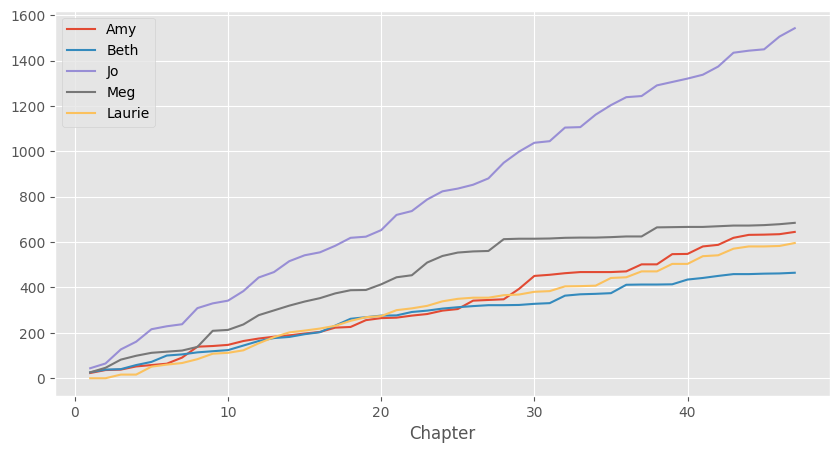

In [8]:
bpd.read_csv('data/lw_counts.csv').plot(x='Chapter');

### Why visualize?

- Computers are better than humans at crunching numbers, but humans are better at identifying visual patterns.

- Visualizations allow us to understand lots of data quickly – they make it easier to spot trends and communicate our results with others.

- There are many types of visualizations; in this class, we'll look at scatter plots, line plots, bar charts, and histograms, but there are many others.
    - The right choice depends on the type of data.

## Terminology

### Individuals and variables

<center><img src='images/states-indiv-var.png' width=1000/></center>

- <span style="color:#6d9eeb"><b>Individual (row)</b></span>: Person/place/thing for which data is recorded. Also called an **observation**.

- <span style="color:#ff9900"><b>Variable (column)</b></span>: Something that is recorded for each individual. Also called a **feature**.

### Types of variables

There are two main types of variables:

- **Numerical**: It makes sense to do arithmetic with the values.
- **Categorical**: Values fall into categories, that may or may not have some _order_ to them.

Note that here, "variable" does not mean a variable in Python, but rather it means a column in a DataFrame.

### Examples of numerical variables

- Salaries of NBA players 🏀.
    - Individual: An NBA player.
    - Variable: Their salary.

- Company's annual profit 💰.
    - Individual: A company.
    - Variable: Its annual profit.

- Flu shots administered per day 💉.
    - Individual: Date.
    - Variable: Number of flu shots administered on that date.

### Examples of categorical variables

- Movie genres 🎬.
    - Individual: A movie.
    - Variable: Its genre.

- Zip codes 🏠.
    - Individual: US resident.
    - Variable: Zip code.
        - Even though they look like numbers, zip codes are categorical (arithmetic doesn't make sense).

- Level of prior programming experience for students in DSC 10 🧑‍🎓.
    - Individual: Student in DSC 10.
    - Variable: Their level of prior programming experience, e.g. none, low, medium, or high. 
        - There is an _order_ to these categories!

### Concept Check ✅

Which of these is **not** a numerical variable?

A. Fuel economy in miles per gallon.

B. Number of quarters at UCSD.

C. College at UCSD (Sixth, Seventh, etc).

D. Bank account number.

E. More than one of these are not numerical variables.

### Types of visualizations

The type of visualization we create depends on the kinds of variables we're visualizing.

- **Scatter plot**: Numerical vs. numerical.
- **Line plot**: Sequential numerical (time) vs. numerical.
- **Bar chart**: Categorical vs. numerical.
- **Histogram**: Numerical.
    - Will cover next time.
    
We may interchange the words "plot", "chart", and "graph"; they all mean the same thing.

## Scatter plots

### The data: exoplanets discovered by NASA 🪐

An [exoplanet](https://exoplanets.nasa.gov/what-is-an-exoplanet/overview/) is a planet outside our solar system. NASA has discovered over 5,000 exoplanets so far in its [search for signs of life beyond Earth](https://exoplanets.nasa.gov/search-for-life/big-questions/). 👽 

|Column |Contents|
|----------|------------|
`'Distance'`| Distance from Earth, in light years.
`'Magnitude'`|	[Apparent magnitude](https://en.wikipedia.org/wiki/Apparent_magnitude#), which measures brightness in such a way that brighter objects have **lower** values.
`'Type'`|  Categorization of planet based on its composition and size.
`'Year'`|	When the planet was discovered.
`'Detection'`|	The method of detection used to discover the planet.
`'Mass'`|	The ratio of the planet's mass to Earth's mass. 
`'Radius'`|  The ratio of the planet's radius to Earth's radius.

In [9]:
exo = bpd.read_csv('data/exoplanets.csv').set_index('Name')
exo

,Distance,Magnitude,Type,Year,Detection,Mass,Radius
Name,,,,,,,
11 Comae Berenices b,304.0,4.72,Gas Giant,2007,Radial Velocity,6165.90,11.88
11 Ursae Minoris b,409.0,5.01,Gas Giant,2009,Radial Velocity,4684.81,11.99
14 Andromedae b,246.0,5.23,Gas Giant,2008,Radial Velocity,1525.58,12.65
...,...,...,...,...,...,...,...
YZ Ceti b,12.0,12.07,Terrestrial,2017,Radial Velocity,0.70,0.91
YZ Ceti c,12.0,12.07,Super Earth,2017,Radial Velocity,1.14,1.05
YZ Ceti d,12.0,12.07,Super Earth,2017,Radial Velocity,1.09,1.03


### Scatter plots

- What is the relationship between `'Distance'` and `'Magnitude'`?

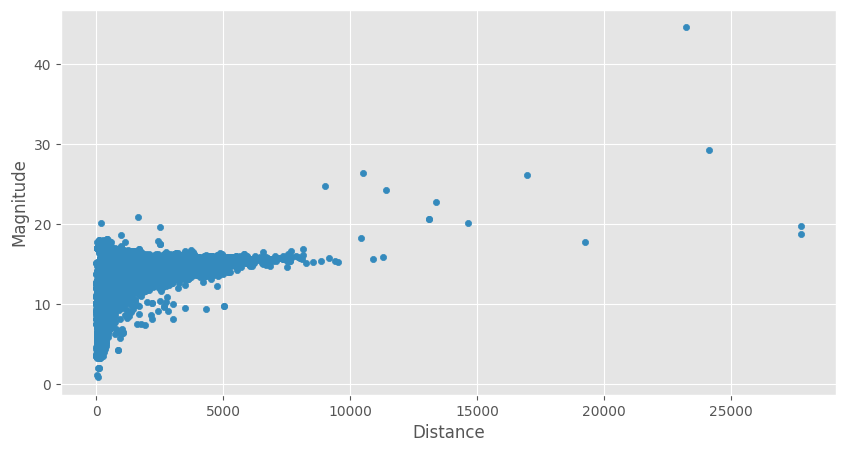

In [10]:
exo.plot(kind='scatter', x='Distance', y='Magnitude');

- Further planets have greater `'Magnitude'` (meaning they are less bright), which makes sense.

- The data appears curved because `'Magnitude'` is measured on a logarithmic scale. A decrease of one unit in `'Magnitude'` corresponds to a 2.5 times increase in brightness.

<center><img src='images/magnitude.png' width=600></center>

### Scatter plots

- Scatter plots visualize the relationship between two numerical variables.
- To create one from a DataFrame `df`, use
```py
df.plot(
    kind='scatter', 
    x=x_column_for_horizontal, 
    y=y_column_for_vertical
)
```
- The resulting scatter plot has one point per row of `df`.
- If you put a semicolon after a call to `.plot`, it will hide the weird text output that displays.

### Zooming in 🔍

The majority of exoplanets are less than 10,000 light years away; if we'd like to zoom in on just these exoplanets, we can query before plotting.

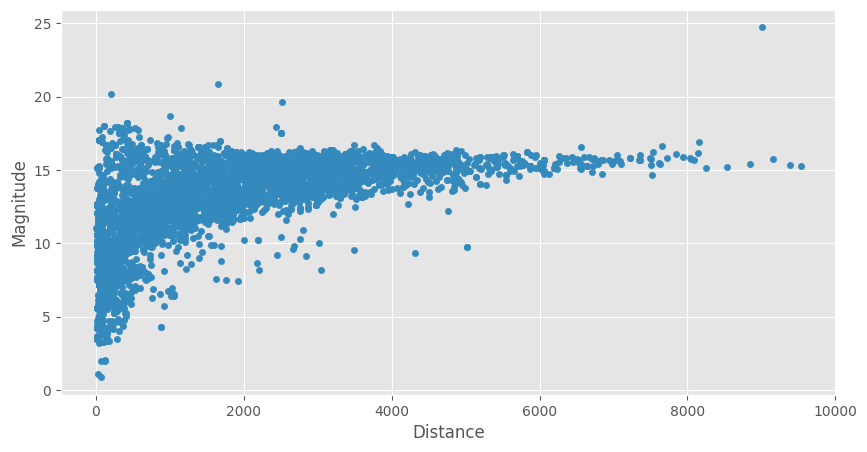

In [11]:
exo[exo.get('Distance') < 10000].plot(kind='scatter', x='Distance', y='Magnitude');

## Line plots 📉

### Line plots

- How has the `'Magnitude'` of newly discovered exoplanets changed over time?

In [12]:
# There were multiple exoplanets discovered each year.
# What operation can we apply to this DataFrame so that there is one row per year?
exo

,Distance,Magnitude,Type,Year,Detection,Mass,Radius
Name,,,,,,,
11 Comae Berenices b,304.0,4.72,Gas Giant,2007,Radial Velocity,6165.90,11.88
11 Ursae Minoris b,409.0,5.01,Gas Giant,2009,Radial Velocity,4684.81,11.99
14 Andromedae b,246.0,5.23,Gas Giant,2008,Radial Velocity,1525.58,12.65
...,...,...,...,...,...,...,...
YZ Ceti b,12.0,12.07,Terrestrial,2017,Radial Velocity,0.70,0.91
YZ Ceti c,12.0,12.07,Super Earth,2017,Radial Velocity,1.14,1.05
YZ Ceti d,12.0,12.07,Super Earth,2017,Radial Velocity,1.09,1.03


- Let's calculate the average `'Magnitude'` of all exoplanets discovered in each `'Year'`.

In [13]:
exo.groupby('Year').mean()

,Distance,Magnitude,Mass,Radius
Year,,,,
1995,50.00,5.45,146.20,13.97
1996,51.33,5.12,1020.67,13.09
1997,57.00,5.41,332.10,13.53
...,...,...,...,...
2021,1944.22,13.01,255.42,4.44
2022,508.61,10.62,943.16,6.77
2023,451.89,12.09,162.78,7.12


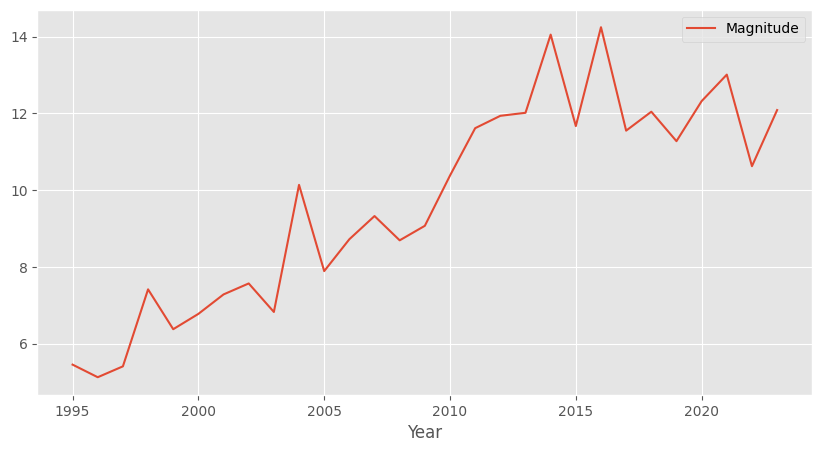

In [14]:
exo.groupby('Year').mean().plot(kind='line', y='Magnitude');

- It looks like the brightest planets were discovered first, which makes sense. 

- NASA's Kepler space telescope began its nine-year mission in 2009, leading to a boom in the discovery of exoplanets.

### Line plots

- Line plots show trends in numerical variables over time.
- To create one from a DataFrame `df`, use
```py
df.plot(
    kind='line', 
    x=x_column_for_horizontal, 
    y=y_column_for_vertical
)
```
- To use the index as the x-axis, omit the `x=` argument.
    - This doesn't work for scatterplots, but it works for most other plot types.

### Extra video on line plots

If you're curious how line plots work under the hood, watch [this video](https://www.youtube.com/watch?v=glzZ04D1kDg) we made a few quarters ago.

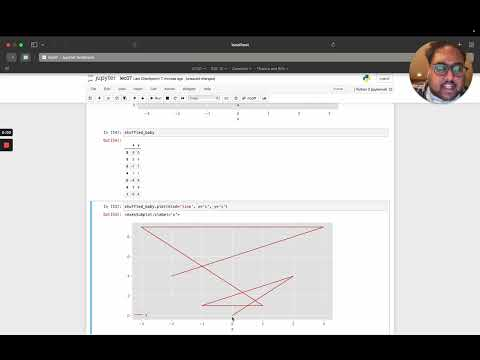

In [15]:
YouTubeVideo('glzZ04D1kDg')

## Bar charts 📊

### Bar charts

- How big are each of the different `'Type'`s of exoplanets, on average?

In [16]:
types = exo.groupby('Type').mean()
types

,Distance,Magnitude,Year,Mass,Radius
Type,,,,,
Gas Giant,1096.40,10.30,2013.73,1472.39,12.74
Neptune-like,2189.02,13.52,2016.59,15.28,3.11
Super Earth,1916.26,13.85,2016.43,5.81,1.58
Terrestrial,1373.60,13.45,2016.37,1.62,0.85


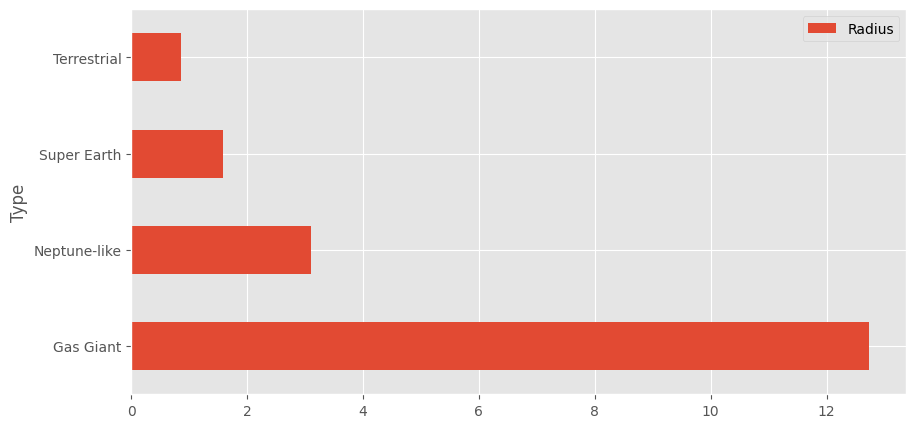

In [17]:
types.plot(kind='barh', y='Radius');

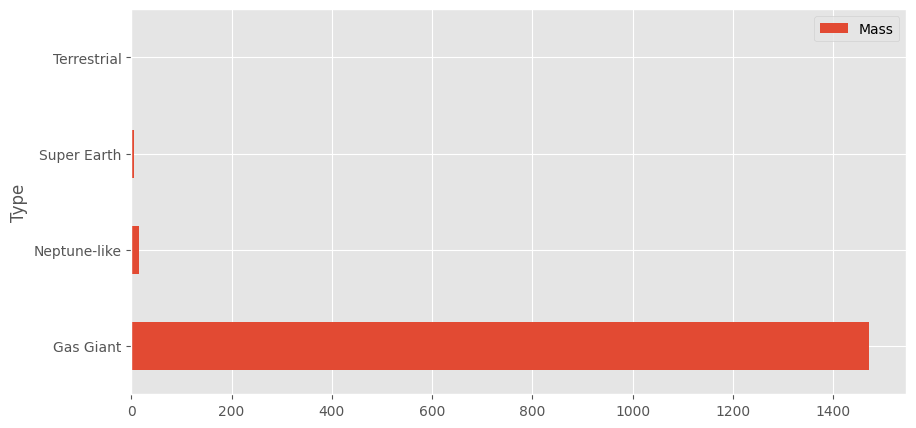

In [18]:
types.plot(kind='barh', y='Mass');

- It looks like the `'Gas Giant'`s are aptly named! 

<center><img src='images/exoplanet_types.jpeg' width=800></center>

### Bar charts

- Bar charts visualize the relationship between a categorical variable and a numerical variable.
- In a bar chart...
    - The thickness and spacing of bars is arbitrary.
    - The order of the categorical labels doesn't matter.
- To create one from a DataFrame `df`, use
```py
df.plot(
    kind='barh', 
    x=categorical_column_name, 
    y=numerical_column_name
)
```
- The **"h"** in `'barh'` stands for **"horizontal"**.
    - It's easier to read labels this way.
- Note that in the previous chart, we set `y='Mass'` even though mass is measured by x-axis length.

### Bar charts and sorting

What are the most popular `'Detection'` methods for discovering exoplanets?

In [19]:
# Count how many exoplanets are discovered by each detection method.
popular_detection = exo.groupby('Detection').count()
popular_detection

,Distance,Magnitude,Type,Year,Mass,Radius
Detection,,,,,,
Astrometry,1,1,1,1,1,1
Direct Imaging,50,50,50,50,50,50
Disk Kinematics,1,1,1,1,1,1
...,...,...,...,...,...,...
Radial Velocity,1019,1019,1019,1019,1019,1019
Transit,3914,3914,3914,3914,3914,3914
Transit Timing Variations,23,23,23,23,23,23


In [20]:
# Give columns more meaningful names and eliminate redundancy.
popular_detection = (popular_detection.assign(Count=popular_detection.get('Distance'))
                                      .get(['Count'])
                                      .sort_values(by='Count', ascending=False)
                    )
popular_detection

,Count
Detection,
Transit,3914
Radial Velocity,1019
Direct Imaging,50
...,...
Astrometry,1
Disk Kinematics,1
Pulsar Timing,1


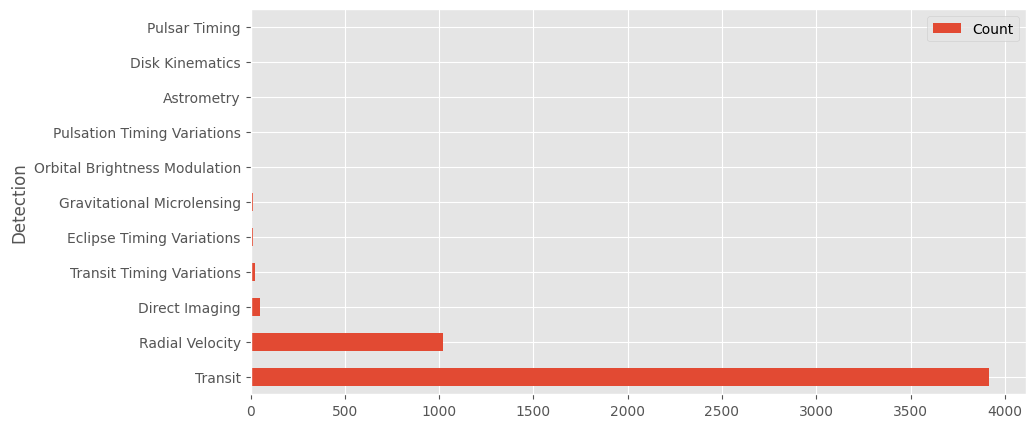

In [21]:
# Notice that the bars appear in the opposite order relative to the DataFrame.
popular_detection.plot(kind='barh', y='Count');

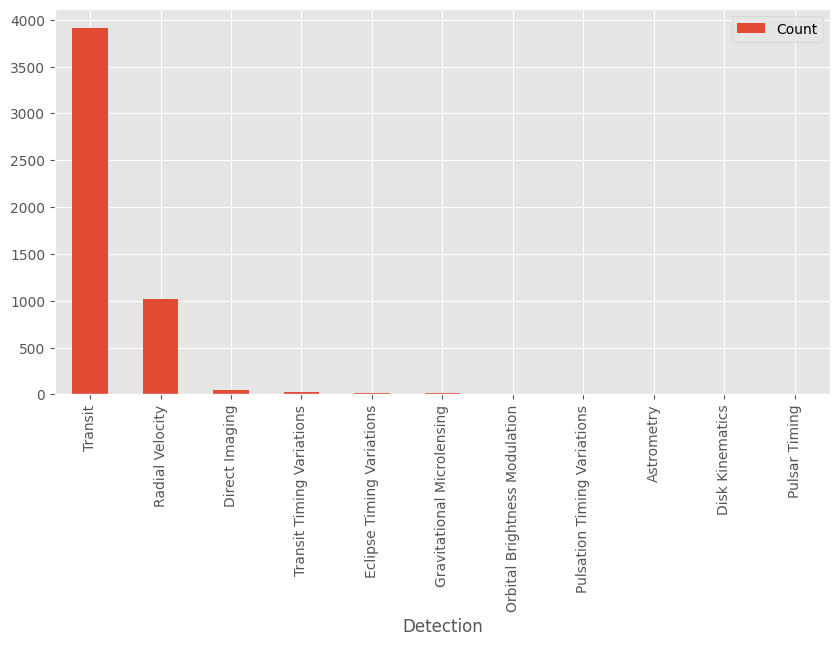

In [22]:
# Change "barh" to "bar" to get a vertical bar chart. 
# These are harder to read, but the bars do appear in the same order as the DataFrame.
popular_detection.plot(kind='bar', y='Count');

### Multiple plots on the same axes

Can we look at both the average `'Magnitude'` and the average `'Radius'` for each `'Type'` at the same time?

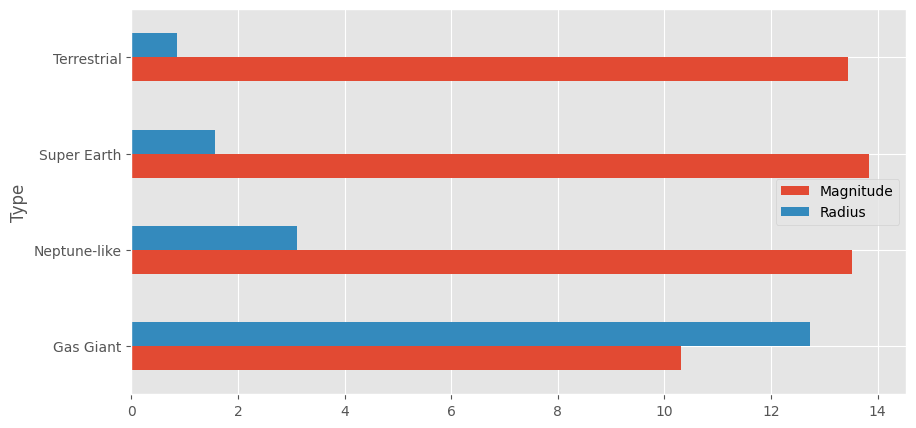

In [23]:
types.get(['Magnitude', 'Radius']).plot(kind='barh');

How did we do that?

### Overlaying plots

When calling `.plot`, if we omit the `y=column_name` argument, **all other columns** are plotted.

In [24]:
types

,Distance,Magnitude,Year,Mass,Radius
Type,,,,,
Gas Giant,1096.40,10.30,2013.73,1472.39,12.74
Neptune-like,2189.02,13.52,2016.59,15.28,3.11
Super Earth,1916.26,13.85,2016.43,5.81,1.58
Terrestrial,1373.60,13.45,2016.37,1.62,0.85


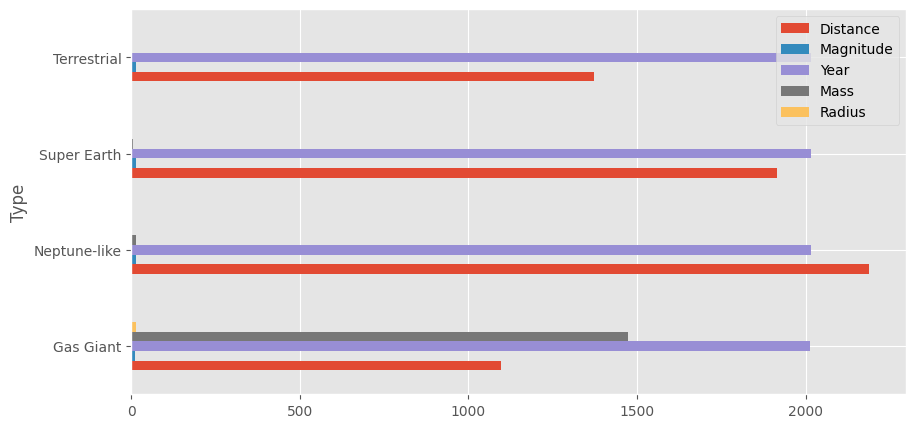

In [25]:
types.plot(kind='barh');

### Selecting multiple columns at once

Remember, to select multiple columns, use `.get([column_1, ..., column_k])`. This returns a DataFrame.

In [26]:
types

,Distance,Magnitude,Year,Mass,Radius
Type,,,,,
Gas Giant,1096.40,10.30,2013.73,1472.39,12.74
Neptune-like,2189.02,13.52,2016.59,15.28,3.11
Super Earth,1916.26,13.85,2016.43,5.81,1.58
Terrestrial,1373.60,13.45,2016.37,1.62,0.85


In [27]:
types.get(['Magnitude', 'Radius'])

,Magnitude,Radius
Type,,
Gas Giant,10.30,12.74
Neptune-like,13.52,3.11
Super Earth,13.85,1.58
Terrestrial,13.45,0.85


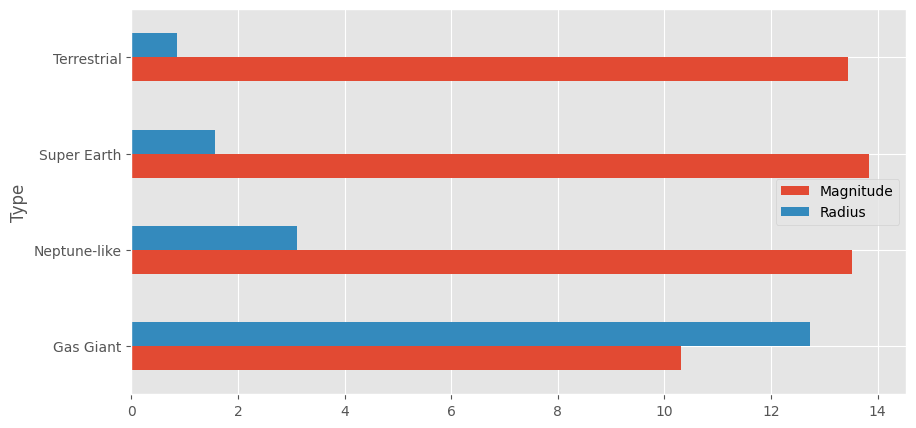

In [28]:
types.get(['Magnitude', 'Radius']).plot(kind='barh');

## Distributions

### What is the distribution of a variable?

- The distribution of a variable consists of all values of the variable that occur in the data, along with their frequencies.
- Distributions help you understand:
    > _How often does a variable take on a certain value?_
- Both categorical and numerical variables have distributions.

### Distributions of categorical variables

The distribution of a categorical variable can be displayed as a table or bar chart, among other ways!

For example, let's look at the distribution of exoplanet `'Type'`s. To do so, we'll need to group.

In [29]:
# Remember, when we group and use .count(), the column names aren't meaningful.
type_counts = exo.groupby('Type').count()
type_counts

,Distance,Magnitude,Year,Detection,Mass,Radius
Type,,,,,,
Gas Giant,1480,1480,1480,1480,1480,1480
Neptune-like,1793,1793,1793,1793,1793,1793
Super Earth,1577,1577,1577,1577,1577,1577
Terrestrial,193,193,193,193,193,193


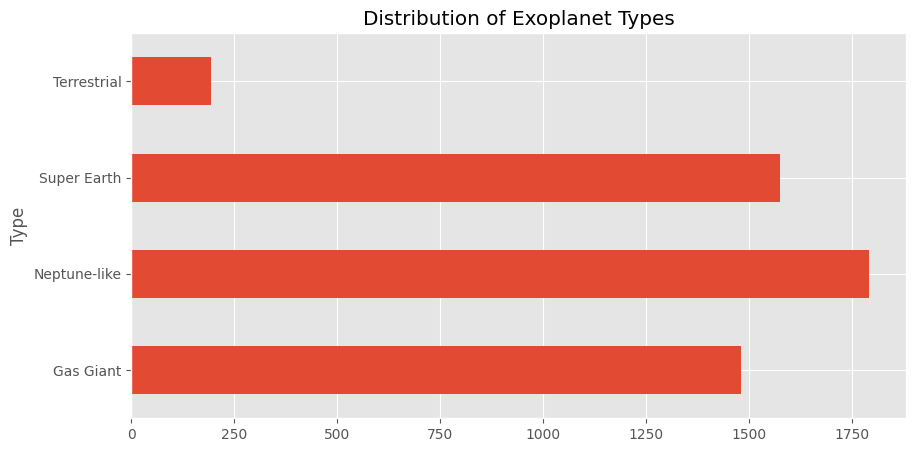

In [30]:
# As a result, we could have set y='Magnitude', for example, and gotten the same plot.
type_counts.plot(kind='barh', y='Distance', 
                 legend=False, title='Distribution of Exoplanet Types');

Notice the optional `title` argument. Some other useful optional arguments are `legend`, `figsize`, `xlabel`, and `ylabel`. There are [many optional arguments](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

It looks like terrestrial exoplanets are the most rare in the dataset. They also have the smallest average radius of any `'Type'`.

In [31]:
exo.groupby('Type').mean().get('Radius')

Type
Gas Giant       12.74
Neptune-like     3.11
Super Earth      1.58
Terrestrial      0.85
Name: Radius, dtype: float64

Let's look into them further!

### Terrestrial exoplanets 🌑

In [32]:
terr = exo[exo.get('Type') == 'Terrestrial']
terr

,Distance,Magnitude,Type,Year,Detection,Mass,Radius
Name,,,,,,,
EPIC 201497682 b,825.0,13.95,Terrestrial,2019,Transit,0.26,0.69
EPIC 201757695.02,1884.0,14.97,Terrestrial,2020,Transit,0.69,0.91
EPIC 201833600 c,840.0,14.71,Terrestrial,2019,Transit,0.97,1.00
...,...,...,...,...,...,...,...
TRAPPIST-1 e,41.0,17.02,Terrestrial,2017,Transit,0.69,0.92
TRAPPIST-1 h,41.0,17.02,Terrestrial,2017,Transit,0.33,0.76
YZ Ceti b,12.0,12.07,Terrestrial,2017,Radial Velocity,0.70,0.91


Let's focus on the `'Radius'` column of `terr`. To learn more about it, we can use the `.describe()` method.

In [33]:
terr.get('Radius').describe()

count    193.00
mean       0.85
std        0.26
          ...  
50%        0.86
75%        0.92
max        3.13
Name: Radius, Length: 8, dtype: float64

But how do we visualize its distribution?

### Visualizing the distribution of `'Radius'`, a numerical variable

- A few slides ago, we looked at the distribution of `'Type'`, which is a categorical variable.
- Now, we'll look at the distribution of `'Radius'`, which is a numerical variable. 
- As we'll see, **a bar chart is not the right choice of visualization for the distribution of a numerical variable**.

To try and see the distribution of `'Radius'`, we need to group by that column and count how many terrestrial planets there are of each radius.

In [34]:
terr_radius = terr.groupby('Radius').count()
terr_radius = (terr_radius
                 .assign(Count=terr_radius.get('Distance'))
                 .get(['Count'])
              )
terr_radius

,Count
Radius,
0.37,1
0.40,1
0.47,1
...,...
1.80,1
2.85,1
3.13,1


The horizontal axis should be numerical (like a number line), not categorical. There should be more space between certain bars than others.

For instance, the planet with `'Radius'` 1.8 is 80% larger than the planet with `'Radius'` 1, but they appear to be about the same size here.


## Density histograms

### Density histograms show the distribution of numerical variables

Instead of a bar chart, we'll visualize the distribution of a numerical variable with a **density histogram**. Let's see what a density histogram for `'Radius'` looks like. What do you notice about this visualization?

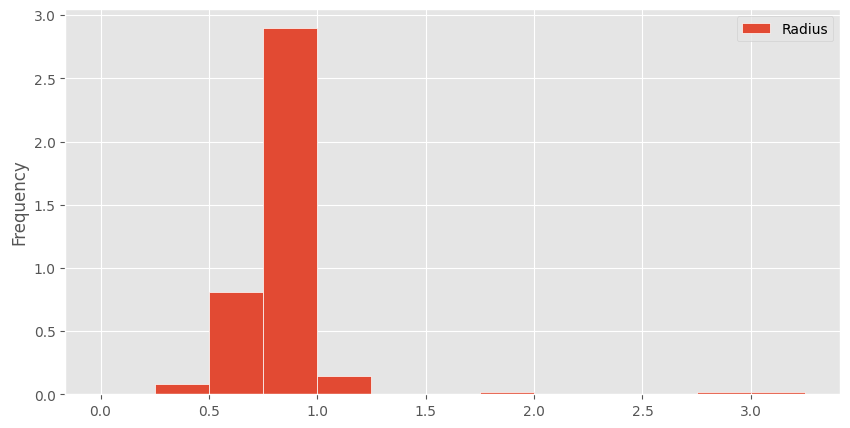

In [35]:
# Ignore the code for right now.
terr.plot(kind='hist', y='Radius', density=True, bins = np.arange(0, 3.5, 0.25), ec='w');

In [36]:
# There are 7 terrestrial exoplanets with a radius of exactly 1.0,
# but the height of the bar starting at 1.0 is not 7!
terr[terr.get('Radius') == 1]

,Distance,Magnitude,Type,Year,Detection,Mass,Radius
Name,,,,,,,
EPIC 201833600 c,840.0,14.71,Terrestrial,2019,Transit,0.97,1.0
EPIC 206215704 b,358.0,17.83,Terrestrial,2019,Transit,0.97,1.0
K2-157 b,973.0,12.94,Terrestrial,2018,Transit,0.97,1.0
K2-239 c,101.0,14.63,Terrestrial,2018,Transit,0.97,1.0
Kepler-1417 b,3235.0,14.04,Terrestrial,2016,Transit,0.97,1.0
Kepler-1464 c,3757.0,14.36,Terrestrial,2016,Transit,0.97,1.0
Kepler-392 b,2223.0,13.53,Terrestrial,2014,Transit,0.97,1.0


### First key idea behind histograms: Binning 🗑️

- Binning is the act of counting the number of numerical values that fall within ranges defined by two endpoints. These ranges are called “bins”.
- A value falls in a bin if it is **greater than or equal to the left** endpoint and **less than the right** endpoint.
    - [a, b): a is included, b is not.
- The width of a bin is its right endpoint minus its left endpoint.


### Plotting a density histogram

- **Density histograms** (not bar charts!) visualize the distribution of a single numerical variable by placing numbers into bins.
- To create one from a DataFrame `df`, use
```py
df.plot(
    kind='hist', 
    y=column_name,
    density=True
)
```
- Optional but recommended: Use `ec='w'` to see where bins start and end more clearly.

### Customizing the bins

- By default, Python will bin your data into 10 equally sized bins.
- You can specify another number of equally sized bins by setting the optional argument `bins` equal to some other integer value.
- You can also specify custom bin start and endpoints by setting `bins` equal to a list or array of bin endpoints.

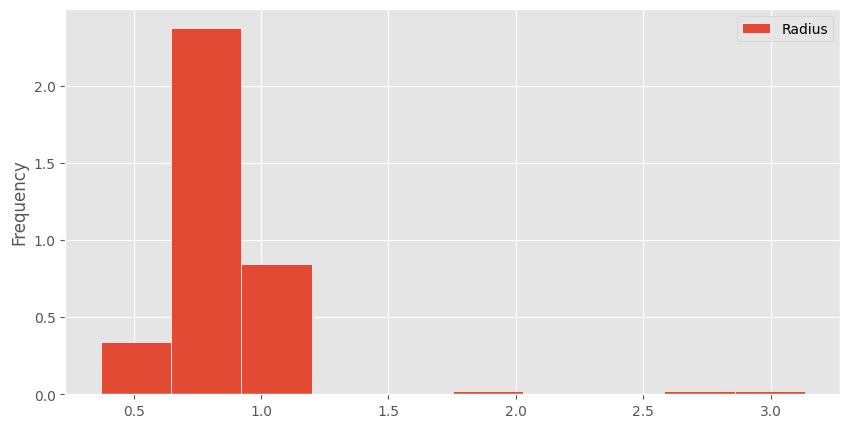

In [38]:
# There are 10 bins by default, some of which are empty.
terr.plot(kind='hist', y='Radius', density=True, ec='w');

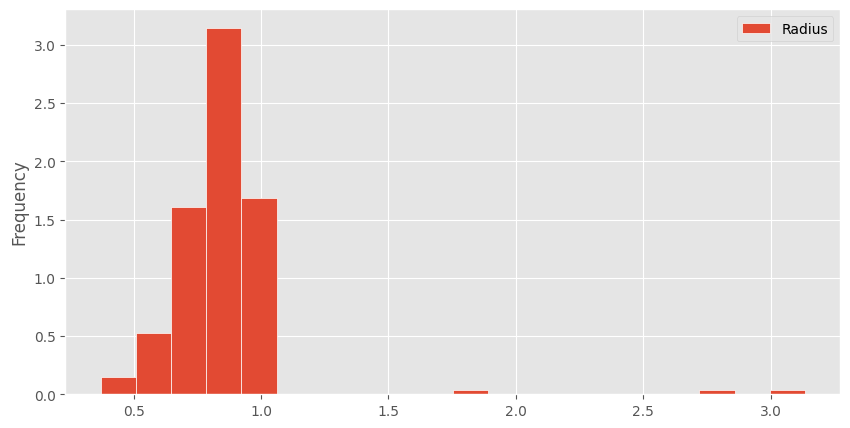

In [39]:
terr.plot(kind='hist', y='Radius', density=True, bins=20, ec='w');

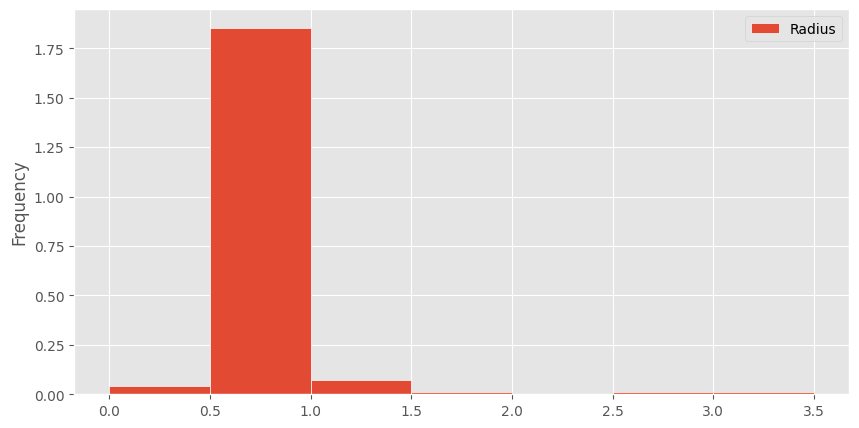

In [40]:
terr.plot(kind='hist', y='Radius', density=True, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5], ec='w');

In the three histograms above, what is different and what is the same?

### Observations
- The general shape of all three histograms is the same, regardless of the bins.
- More bins gives a finer, more granular picture of the distribution of the variable `'Radius'`.
- The $y$-axis values seem to change a lot when we change the bins. Hang onto that thought; we'll see why shortly.

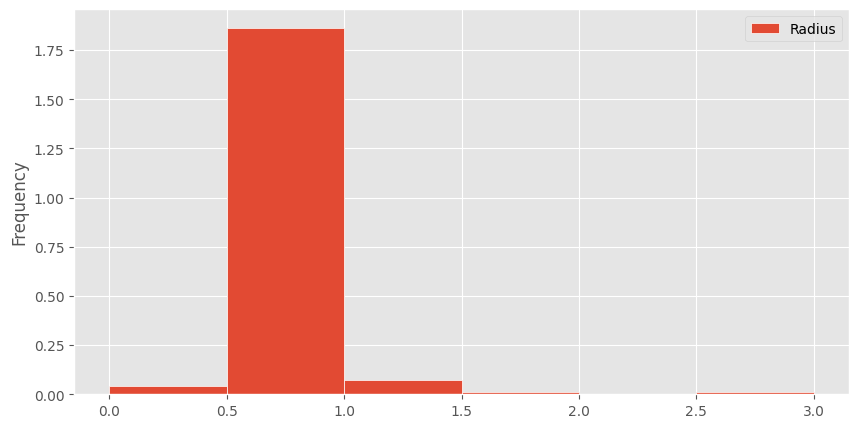

In [41]:
terr.plot(kind='hist', y='Radius', density=True,
            bins=np.arange(0, 3.5, 0.5),
            ec='w');

In [42]:
terr.sort_values('Radius', ascending=False)

,Distance,Magnitude,Type,Year,Detection,Mass,Radius
Name,,,,,,,
Kepler-33 c,3944.0,14.10,Terrestrial,2011,Transit,0.39,3.13
K2-138 f,661.0,12.25,Terrestrial,2017,Transit,1.63,2.85
Kepler-11 b,2108.0,13.82,Terrestrial,2010,Transit,1.90,1.80
...,...,...,...,...,...,...,...
Kepler-102 b,352.0,12.07,Terrestrial,2014,Transit,4.30,0.47
Kepler-444 b,119.0,8.87,Terrestrial,2015,Transit,0.04,0.40
Kepler-37 e,209.0,9.77,Terrestrial,2014,Transit Timing Variations,0.03,0.37


In the above example, the terrestrial exoplanet with the largest radius (Kepler-33 c) is not included because the rightmost bin is [2.5, 3.0] and Kepler-33 c has a `'Radius'` of 3.13.

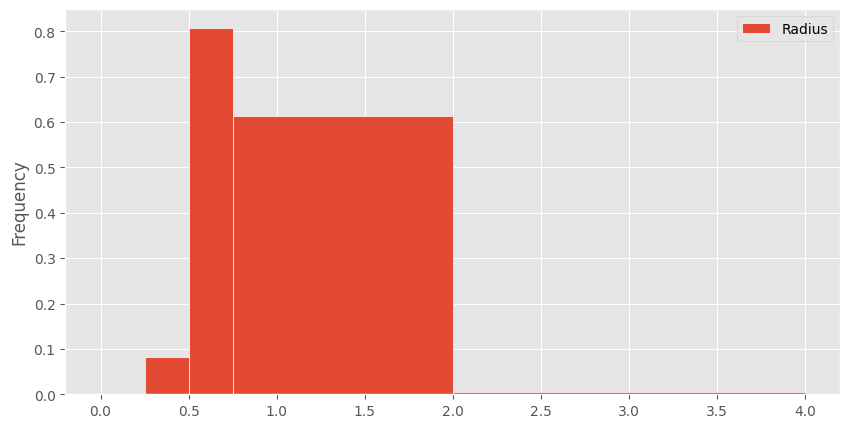

In [43]:
terr.plot(kind='hist', y='Radius', density=True,
          bins=[0, 0.25, 0.5, 0.75, 2, 4], ec='w');

In the above example, the bins have different widths!

### Second key idea behind histograms: Total area is 1

- In a density histogram, the $y$-axis can be hard to interpret, but it's designed to give the histogram a very nice property: 
<br><br>
<center>
    <b>The bars of a density histogram<br>have a combined total area of 1.</b>
</center>

- Important: <b>The area of a bar is equal to the proportion of all data points that fall into that bin</b>.

- Recall from the pretest, proportions and percentages represent the same thing.
    - A proportion is a decimal between 0 and 1, a percentage is between 0\% and 100\%.
    - The proportion 0.34 means 34\%.

### Example calculation

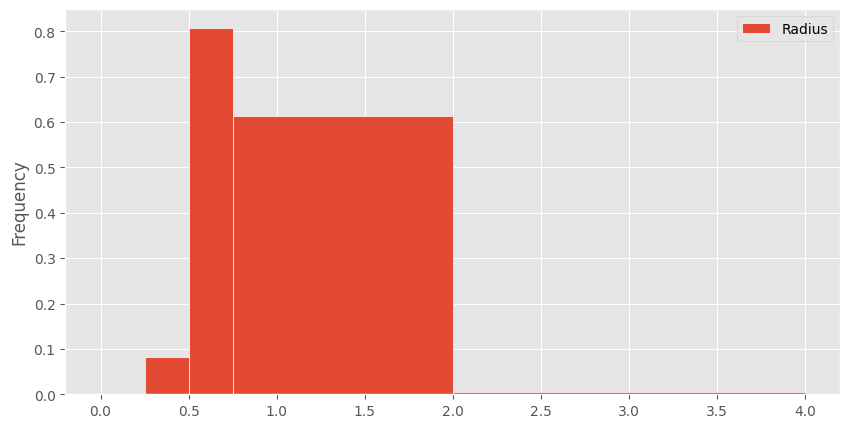

In [44]:
terr.plot(kind='hist', y='Radius', density=True,
          bins=[0, 0.25, 0.5, 0.75, 2, 4], ec='w');

Based on this histogram, what proportion of terrestrial exoplanets have a `'Radius'` between 0.5 and 0.75?

### Example calculation

- The height of the [0.5, 0.75) bar looks to be around 0.8.
- The width of the bin is 0.75 - 0.5 = 0.25.

- Therefore, using the formula for the area of a rectangle,

$$\begin{align}\text{Area} &= \text{Height} \times \text{Width} \\ &= 0.8 \times 0.25 \\ &= 0.2
\end{align}$$

- Since areas represent proportions, this means that the proportion of terrestrial exoplanets with a radius between 0.5 and 0.75 is about 0.2 (or 20\%).

In [45]:
in_range = terr[(terr.get('Radius') >= 0.5) & (terr.get('Radius') < 0.75)].shape[0]
in_range

39

In [46]:
in_range / terr.shape[0]

0.20207253886010362

This matches the result we got. (Not exactly, since we made an estimate for the height.)